In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("Business Case Data.xlsx")
data.head()

,STORE_CODE,CHANNEL,SALES_AREA,ANALYSIS_STORE_TYPE,CATEGORY_UNITS_SALES_pre,CATEGORY_UNITS_SALES_post,BRAND1_BIG_pre,BRAND1_BIG_post,BRAND1_MEDIUM_pre,BRAND1_MEDIUM_post,BRAND1_POP_pre,BRAND1_POP_post,BRAND1_SMALL_pre,BRAND1_SMALLl_post,BRAND2_BIG_pre,BRAND2_BIG_post,BRAND2_MEDIUM_pre,BRAND2_MEDIUM_post
0,100076,Supermarket,Madrid North,Test Group,912,4752,192,1920,0,0,0,1200,0,192,720,1260,0,180
1,100079,Supermarket,Madrid North,Test Group,3048,6976,960,3072,0,0,0,1000,288,384,1440,2160,360,360
2,100136,Supermarket,Madrid West,Test Group,1626,1504,1536,0,0,384,0,400,0,0,0,720,90,0
3,100160,Supermarket,Madrid West,Test Group,3176,8656,2816,4992,0,960,0,1600,0,384,360,720,0,0
4,100163,Supermarket,Madrid West,Test Group,1512,848,1152,0,0,0,0,800,0,48,360,0,0,0


In [4]:
channels=data['CHANNEL'].unique()
areas=data['SALES_AREA'].unique()
print(channels)
print(areas)

['Supermarket' 'Convenience']
['Madrid North' 'Madrid West' 'Madrid East' 'Greater Madrid']


In [15]:
#changes among brands
cambio_b = data['BRAND1_BIG_post']-data['BRAND1_BIG_pre']
cambio_m = data['BRAND1_MEDIUM_post']-data['BRAND1_MEDIUM_pre']
cambio_s = data['BRAND1_SMALLl_post']-data['BRAND1_SMALL_pre']
cambio_p = data['BRAND1_POP_post']-data['BRAND1_POP_pre']

mean_cb= cambio_b.mean()
mean_cm= cambio_m.mean()
mean_cs= cambio_s.mean()

print(mean_cb)
print(mean_cm)
print(mean_cs)


19.972453787604206
22.779267850670532
32.226168901776006


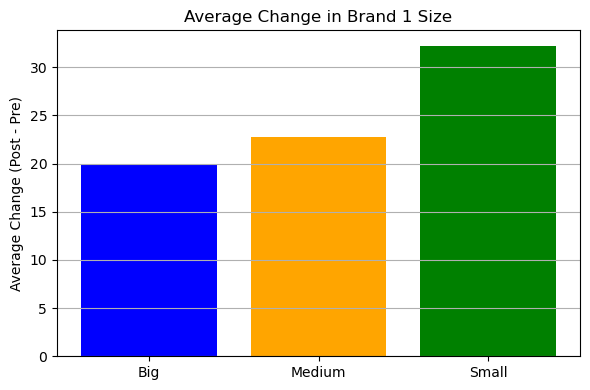

In [23]:

mean_values = [mean_cb, mean_cm, mean_cs]
labels = ['Big', 'Medium', 'Small']
colors = ['blue', 'orange', 'green']

# Gráfico de barras individual
plt.figure(figsize=(6, 4))
plt.bar(labels, mean_values, color=colors)
plt.title('Average Change in Brand 1 Size')
plt.ylabel('Average Change (Post - Pre)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [22]:
cambio2_b = data['BRAND2_BIG_post']-data['BRAND2_BIG_pre']
cambio2_m = data['BRAND2_MEDIUM_post']-data['BRAND2_MEDIUM_pre']

mean2_cb= cambio2_b.mean()
mean2_cm= cambio2_m.mean()

print(mean2_cb)
print(mean2_cm)

-22.138455962305184
7.611453425154041


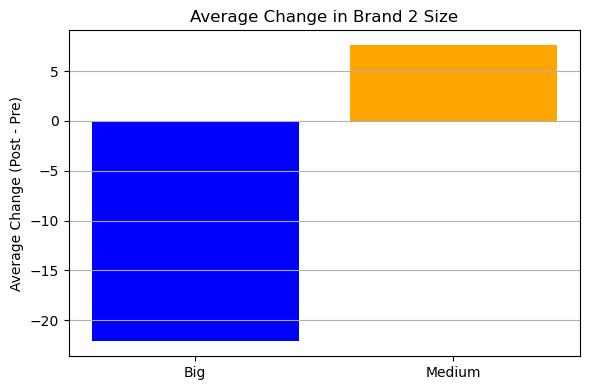

In [24]:
mean_values = [mean2_cb, mean2_cm]
labels = ['Big', 'Medium']
colors = ['blue', 'orange']

plt.figure(figsize=(6, 4))
plt.bar(labels, mean_values, color=colors)
plt.title('Average Change in Brand 2 Size')
plt.ylabel('Average Change (Post - Pre)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [30]:
###Change depending of channel
superm = data[data['CHANNEL'] == 'Supermarket']
conv = data[data['CHANNEL'] == 'Convenience']

In [31]:
chan_s_b = superm['BRAND1_BIG_post']-superm['BRAND1_BIG_pre']
chan_s_m = superm['BRAND1_MEDIUM_post']-superm['BRAND1_MEDIUM_pre']
chan_c_b = conv['BRAND1_BIG_post']-conv['BRAND1_BIG_pre']
chan_c_m = conv['BRAND1_MEDIUM_post']-conv['BRAND1_MEDIUM_pre']


In [35]:
avg_sup_b = chan_s_b.mean()
avg_sup_m = chan_s_m.mean()
avg_conv_b = chan_c_b.mean()
avg_conv_m = chan_c_m.mean()

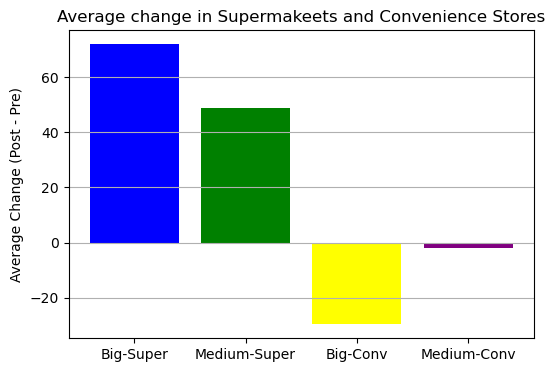

In [36]:
mean_values = [avg_sup_b, avg_sup_m, avg_conv_b, avg_conv_m]
labels = ['Big-Super', 'Medium-Super','Big-Conv', 'Medium-Conv' ]
colors = ['blue', 'green', 'yellow', 'purple']

plt.figure(figsize=(6, 4))
plt.bar(labels, mean_values, color=colors)
plt.title('Average change in Supermakeets and Convenience Stores')
plt.ylabel('Average Change (Post - Pre)')
plt.grid(axis='y')
plt.show()

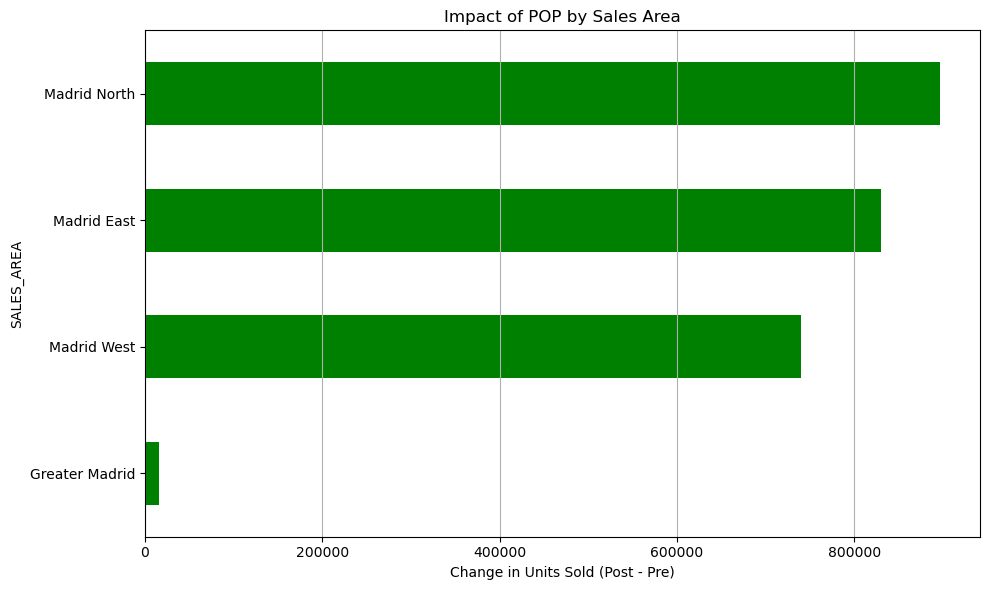

In [39]:
pop_change = data.groupby('SALES_AREA')[['CATEGORY_UNITS_SALES_post', 'CATEGORY_UNITS_SALES_pre']].sum()
pop_change['Change'] = pop_change['CATEGORY_UNITS_SALES_post'] - pop_change['CATEGORY_UNITS_SALES_pre']
pop_change = pop_change.sort_values('Change')

# Graficar
plt.figure(figsize=(10, 6))
pop_change['Change'].plot(kind='barh', color=['green' if x > 0 else 'red' for x in pop_change['Change']])
plt.title('Impact of POP by Sales Area')
plt.xlabel('Change in Units Sold (Post - Pre)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


In [41]:
import plotly.express as px
import pandas as pd

# Tus datos
mean_values = [avg_sup_b, avg_sup_m, avg_conv_b, avg_conv_m]
labels = ['Big-Supermarket', 'Medium-Supermarket', 'Big-Convenience', 'Medium-Convenience']
colors = ['blue', 'green', 'yellow', 'purple']

# Crear DataFrame
df_plot = pd.DataFrame({
    'Segment': labels,
    'Change': mean_values,
    'Color': colors
})

# Crear gráfico interactivo
fig = px.bar(df_plot,
             x='Segment',
             y='Change',
             color='Segment',
             color_discrete_sequence=colors,
             title='Average change in Supermarkets and Convenience Stores',
             labels={'Change': 'Avg Change (Post - Pre)'}
            )

fig.update_layout(showlegend=False)
fig.show()
